In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('sample_data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


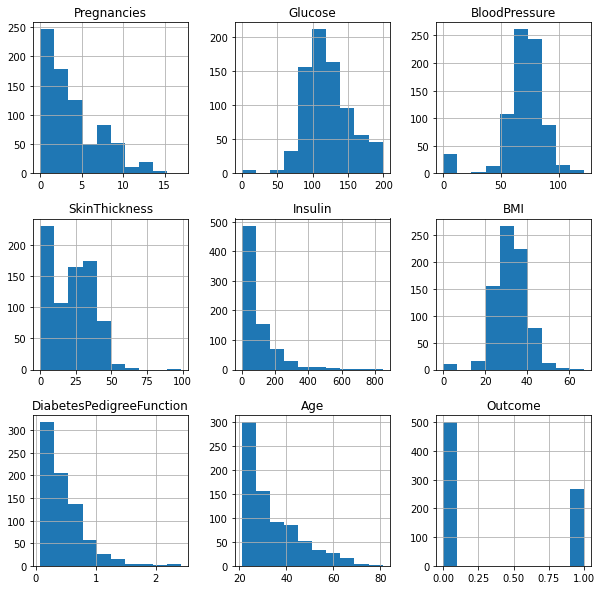

In [ ]:
p = df.hist(figsize = (10,10))

In [ ]:
# We can now fill the null values with the mean
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].mean(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].mean(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].mean(), inplace = True)


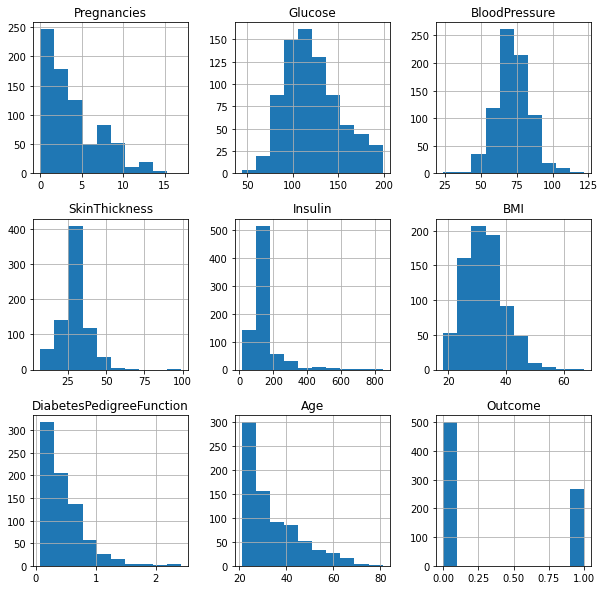

In [ ]:
p = df_copy.hist(figsize = (10,10))

p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')
# annote is to show values on the cell and cmap is the color of the map (red, yellow, green)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [ ]:
scaler = StandardScaler()
X = df_copy.drop(['Outcome', 'Glucose'], axis=1)
y = df_copy['Outcome']

In [ ]:
# X = scaler.fit_transform(X)

In [ ]:
print(X)

     Pregnancies  BloodPressure  SkinThickness     Insulin   BMI  \
0              6           72.0       35.00000  155.548223  33.6   
1              1           66.0       29.00000  155.548223  26.6   
2              8           64.0       29.15342  155.548223  23.3   
3              1           66.0       23.00000   94.000000  28.1   
4              0           40.0       35.00000  168.000000  43.1   
..           ...            ...            ...         ...   ...   
763           10           76.0       48.00000  180.000000  32.9   
764            2           70.0       27.00000  155.548223  36.8   
765            5           72.0       23.00000  112.000000  26.2   
766            1           60.0       29.15342  155.548223  30.1   
767            1           70.0       31.00000  155.548223  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21 

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
X_train.shape

(576, 7)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,LeakyReLU, BatchNormalization, Input, Dropout
from keras import Sequential

In [ ]:
model = Sequential([
#     Input((4610, 124621)),
    Input((7,1)),
    Dense(512),
    BatchNormalization(),
    Dropout(0.25),
    Dense(256),
    BatchNormalization(),
    Dropout(0.25),
    Dense(64),
    Dense(1, activation='sigmoid'),
])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 7, 512)            1024      
                                                                 
 batch_normalization_10 (Bat  (None, 7, 512)           2048      
 chNormalization)                                                
                                                                 
 dropout_10 (Dropout)        (None, 7, 512)            0         
                                                                 
 dense_26 (Dense)            (None, 7, 256)            131328    
                                                                 
 batch_normalization_11 (Bat  (None, 7, 256)           1024      
 chNormalization)                                                
                                                                 
 dropout_11 (Dropout)        (None, 7, 256)           

In [ ]:
optimizer=tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, 
                        epochs=250, 
                    batch_size=16,
                        validation_split=0.2, 
                        shuffle=False)

Epoch 1/250
29/29 [==============================] - 1s 15ms/step - loss: 0.8299 - accuracy: 0.5307 - val_loss: 0.6964 - val_accuracy: 0.6379
Epoch 2/250
29/29 [==============================] - 0s 6ms/step - loss: 0.7703 - accuracy: 0.5587 - val_loss: 0.7709 - val_accuracy: 0.5530
Epoch 3/250
29/29 [==============================] - 0s 7ms/step - loss: 0.7259 - accuracy: 0.5972 - val_loss: 0.6654 - val_accuracy: 0.6379
Epoch 4/250
29/29 [==============================] - 0s 7ms/step - loss: 0.7266 - accuracy: 0.5978 - val_loss: 0.6615 - val_accuracy: 0.6379
Epoch 5/250
29/29 [==============================] - 0s 7ms/step - loss: 0.7167 - accuracy: 0.6109 - val_loss: 0.6639 - val_accuracy: 0.6379
Epoch 6/250
29/29 [==============================] - 0s 7ms/step - loss: 0.6944 - accuracy: 0.6208 - val_loss: 0.6541 - val_accuracy: 0.6379
Epoch 7/250
29/29 [==============================] - 0s 7ms/step - loss: 0.6907 - accuracy: 0.6165 - val_loss: 0.6530 - val_accuracy: 0.6392
Epoch 8/250


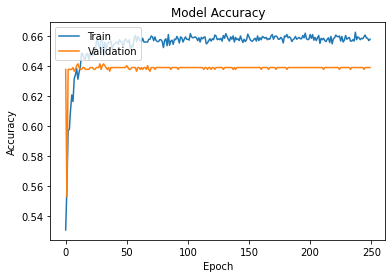

In [ ]:
# Plot training and validation accuracy scores
# against the number of epochs.
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accuracy')
plt.legend(loc='upper left')

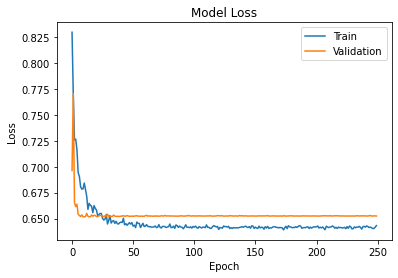

In [ ]:
# Plot training and validation loss scores
# against the number of epochs.
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss')
plt.legend(loc='upper right')

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

6/6 [==============================] - 0s 3ms/step - loss: 0.6515 - accuracy: 0.6406
Test loss: 0.6514508724212646
Test accuracy: 0.640625
